In [1]:
!pip install kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset from an online source (GitHub raw CSV)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = df[['rm']]       # feature
y = df['medv']       # target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

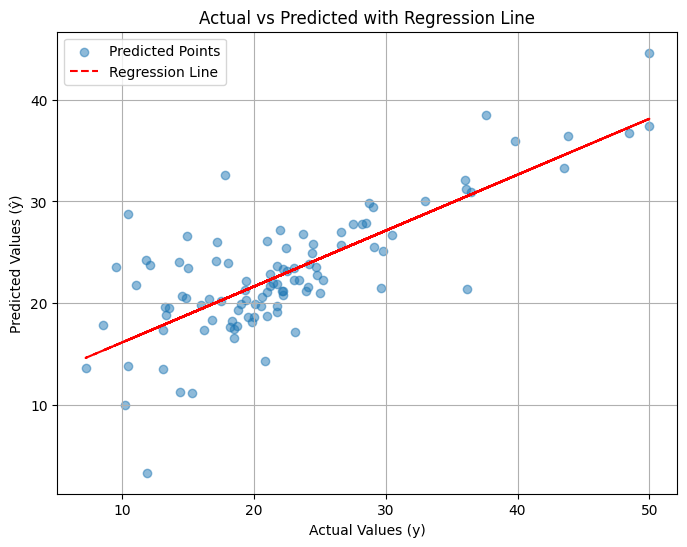

In [13]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted Points")

# Regression line (best-fit line)
z = np.polyfit(y_test, y_pred, 1)  
p = np.poly1d(z)

plt.plot(y_test, p(y_test), "r--", label="Regression Line")

plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values (ŷ)")
plt.title("Actual vs Predicted with Regression Line")
plt.legend()
plt.grid(True)

plt.show()

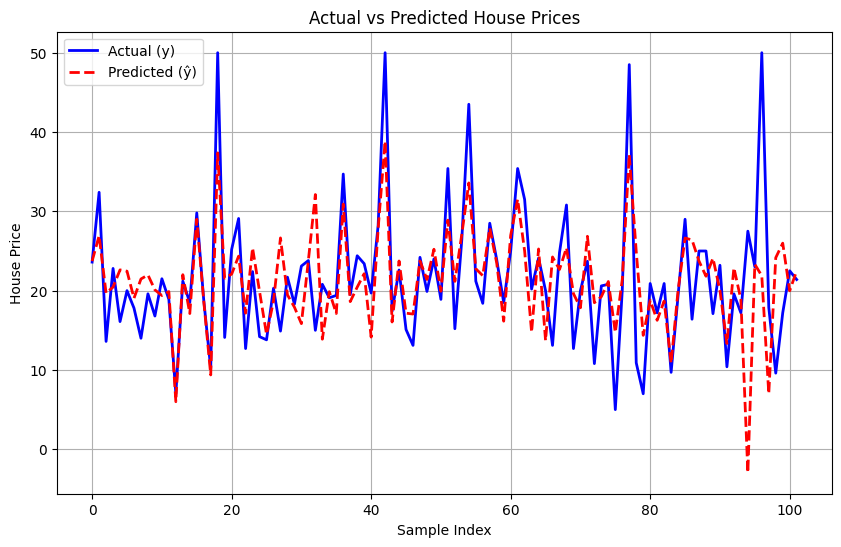

Mean Squared Error (MSE): 46.145
R² Score: 0.371


In [6]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test.values, label='Actual (y)', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted (ŷ)', color='red', linestyle='--', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

In [7]:
mse_list = []
r2_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

# Correlation between 30 MSE and R2 values
correlation = np.corrcoef(mse_list, r2_list)[0, 1]
print("Correlation between MSE and R2:", correlation)


Correlation between MSE and R2: -0.7837564236586577


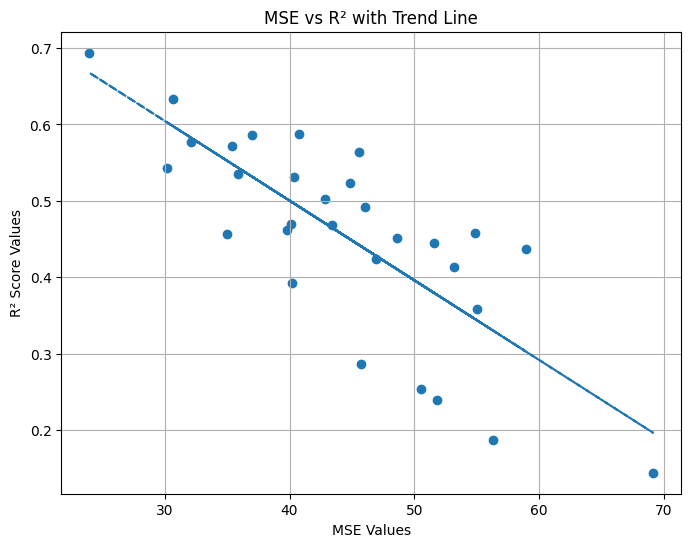

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example lists (replace with your actual mse_list and r2_list)
# mse_list = [...]
# r2_list = [...]

# Compute regression line (best-fit line)
z = np.polyfit(mse_list, r2_list, 1)     # 1 → linear fit
p = np.poly1d(z)                         # polynomial model

plt.figure(figsize=(8, 6))

# Scatter plot of actual data
plt.scatter(mse_list, r2_list)

# Trend line
plt.plot(mse_list, p(mse_list), "--")

plt.xlabel("MSE Values")
plt.ylabel("R² Score Values")
plt.title("MSE vs R² with Trend Line")
plt.grid(True)

plt.show()


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Mean Square Error:", mse)
print("R2 Score:", r2)

Mean Square Error: 32.09840248431335
R2 Score: 0.5775934558630064


In [10]:
mse_list = []
r2_list = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

# Correlation between 30 MSE and R2 values
correlation = np.corrcoef(mse_list, r2_list)[0, 1]
print("Correlation between MSE and R2:", correlation)


Correlation between MSE and R2: -0.7837564236586577


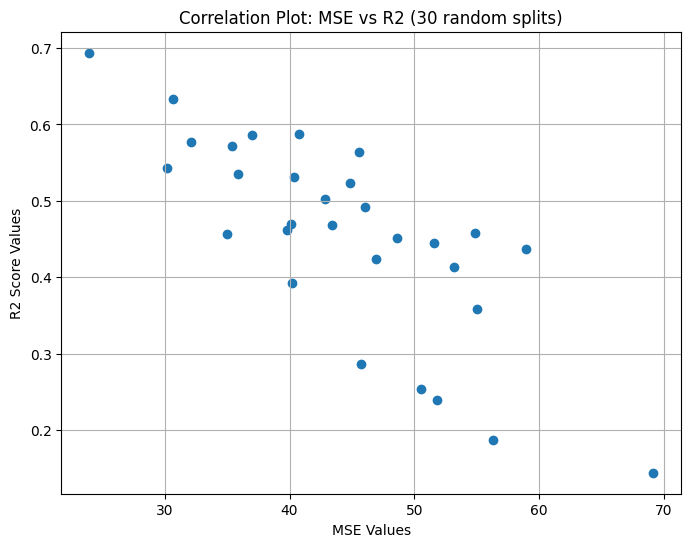

In [11]:
# Scatter plot between MSE and R2
plt.figure(figsize=(8,6))
plt.scatter(mse_list, r2_list)

plt.xlabel("MSE Values")
plt.ylabel("R2 Score Values")
plt.title("Correlation Plot: MSE vs R2 (30 random splits)")
plt.grid(True)
plt.show()